In [1]:
# Imports
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# https://stackoverflow.com/questions/28816046/
# displaying-different-images-with-actual-size-in-matplotlib-subplot
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width = im_data.shape[:2]

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis("off")

    # Display the image.
    ax.imshow(im_data, cmap="gray")

    plt.show()

In [3]:
def areaFilter(minArea, inputImage):
    # Perform an area filter on the binary blobs:
    componentsNumber, labeledImage, componentStats, componentCentroids = \
        cv2.connectedComponentsWithStats(inputImage, connectivity=4)

    # Get the indices/labels of the remaining components based on the area stat
    # (skip the background component at index 0)
    remainingComponentLabels = [i for i in range(1, componentsNumber) if componentStats[i][4] >= minArea]

    # Filter the labeled pixels based on the remaining labels,
    # assign pixel intensity to 255 (uint8) for the remaining pixels
    filteredImage = np.where(np.isin(labeledImage, remainingComponentLabels) == True, 255, 0).astype('uint8')

    return filteredImage

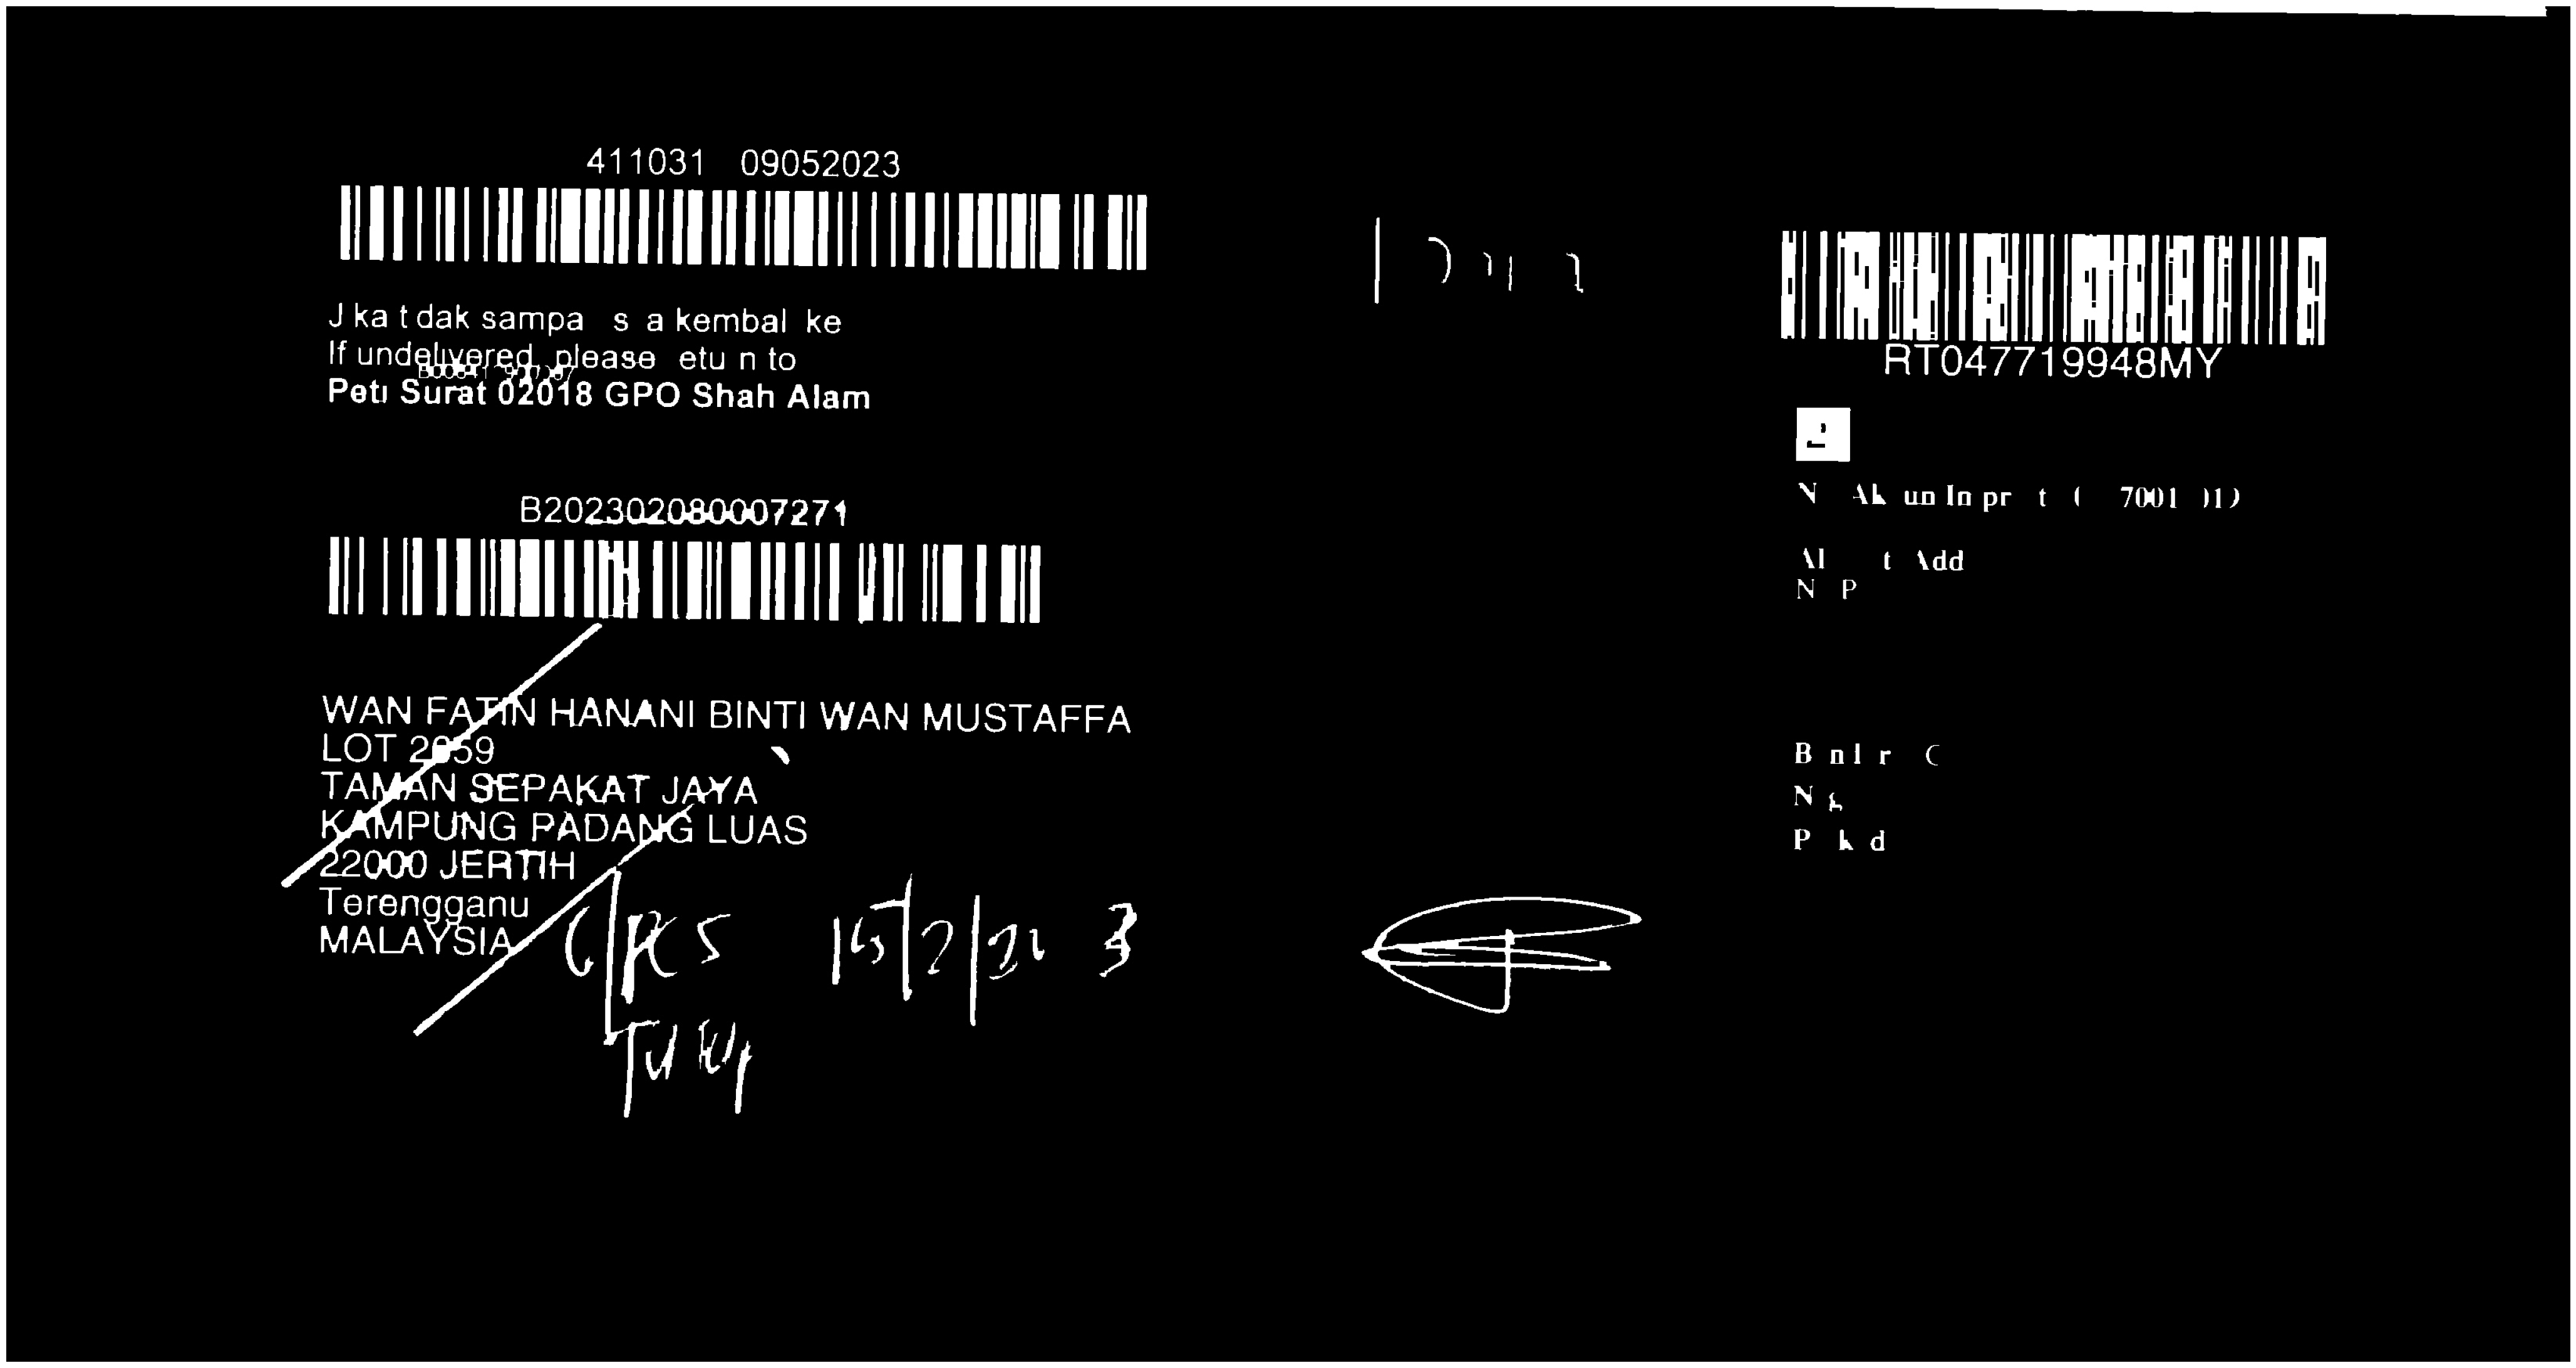

In [14]:
# Read image
imagePath = "my_data/target_0.jpg"
inputImage = cv2.imread(imagePath)

# Conversion to CMYK (just the K channel):

# Convert to float and divide by 255:
imgFloat = inputImage.astype(np.float64) / 255.

# Calculate channel K:
kChannel = 1 - np.max(imgFloat, axis=2)

# Convert back to uint 8:
kChannel = (255 * kChannel).astype(np.uint8)

# Threshold image:
binaryThresh = 130
_, binaryImage = cv2.threshold(kChannel, binaryThresh, 255, cv2.THRESH_BINARY)

# Filter small blobs:
minArea = 100
binaryImage = areaFilter(minArea, binaryImage)

# Use a little bit of morphology to clean the mask:
# Set kernel (structuring element) size:
kernelSize = 3
# Set morph operation iterations:
opIterations = 2
# Get the structuring element:
morphKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernelSize, kernelSize))
# Perform closing:
binaryImage = cv2.morphologyEx(binaryImage, cv2.MORPH_CLOSE, morphKernel, None, None, opIterations, cv2.BORDER_REFLECT101)

cv2.imwrite("my_temp/thres.jpg", binaryImage)
display("my_temp/thres.jpg")